In [1]:
library('bedtoolsr')
library('dplyr')
# library('tidyr')
library(ggplot2)
library("UpSetR")
library("reshape2")
library('ggpointdensity')
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
# Read in model
df <- read.csv('MG.AD.8.14.24.csv', row.names = 1)

In [3]:
head(df)

,Unnamed..0,X.chrom,chromStart,chromEnd,name,ref,altCount,alts,shiftBases,freqSourceCount,⋯,neg_observed_inactive_allele,neg_observed_seqlet_len,neg_prominence_pval,neg_magnitude_pval,delta_score,delta_p_val,explain_score,explain_pval,ISM_score,ISM_pval
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,chr4,10833540,10833541,rs2869756,G,3,A,0,31,⋯,noneffect,7,0.8312925,0.82993197,-0.108384,0.96115110,-0.01843883,0.9423864,-0.01845,0.9429670
1,2,chr4,10833540,10833541,rs2869756,G,3,C,0,31,⋯,noneffect,7,0.8129252,0.79863946,-0.473101,0.81048803,-0.06044845,0.7930927,-0.06050,0.7935730
2,3,chr4,10833540,10833541,rs2869756,G,3,T,0,31,⋯,noneffect,7,0.1156463,0.05714286,-3.430211,0.10789385,-0.40337810,0.1037863,-0.40336,0.1040086
3,4,chr4,10833921,10833931,rs201322813,TTTTTTTTTT,3,TTTTTTTTT,10,31,⋯,effect,7,0.9802721,0.98095238,0.000000,0.99342599,0.00000000,0.9908733,0.00000,0.9902793
4,5,chr4,10833921,10833931,rs201322813,TTTTTTTTTT,3,TTTTTTTTTTT,10,31,⋯,noneffect,7,0.7925170,0.79251701,0.369196,0.83999124,-0.03906129,0.8683620,-0.02300,0.9265587
5,6,chr4,10833921,10833931,rs201322813,TTTTTTTTTT,3,TTTTTTTTTTTT,10,31,⋯,effect,7,0.8312925,0.79183673,5.652579,0.01924061,0.29371271,0.2081314,0.33746,0.1560481



	Pearson's product-moment correlation

data:  df$explain_score and df$delta_score
t = 380.55, df = 978, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9961924 0.9970358
sample estimates:
      cor 
0.9966404 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


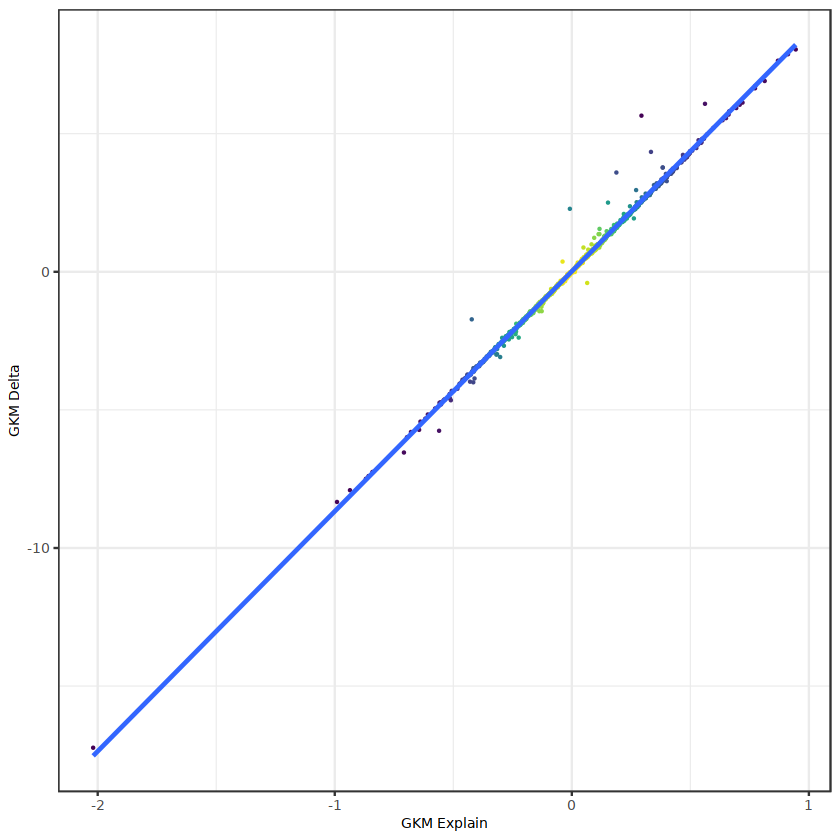

In [4]:
 cor.test(df$explain_score, df$delta_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=explain_score,y=delta_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('GKM Explain') +
    ylab("GKM Delta") + geom_smooth(method=lm, se=FALSE)
ggsave('MG.explain.delta.pdf', height = 1.25, width =1.25)


	Pearson's product-moment correlation

data:  df$ISM_score and df$delta_score
t = 358.92, df = 978, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9957223 0.9966696
sample estimates:
      cor 
0.9962255 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


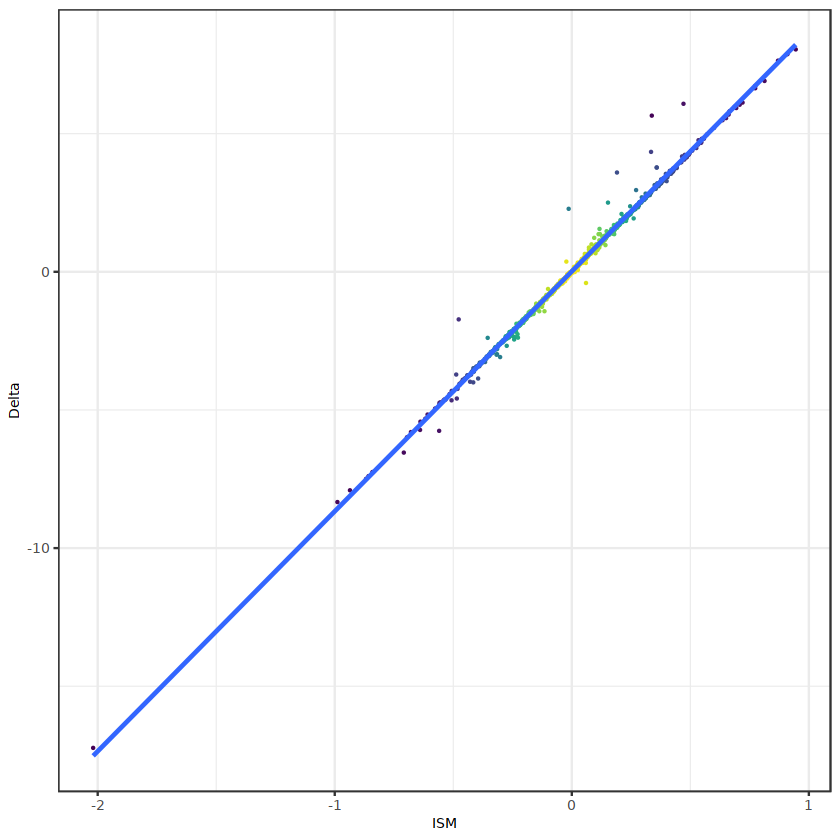

In [5]:
 cor.test(df$ISM_score, df$delta_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=ISM_score,y=delta_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('ISM') +
    ylab("Delta") + geom_smooth(method=lm, se=FALSE)
ggsave('MG.ISM.delta.pdf', height = 1.25, width =1.25)


	Pearson's product-moment correlation

data:  df$explain_score and df$ISM_score
t = 1565.1, df = 978, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9997738 0.9998240
sample estimates:
      cor 
0.9998004 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


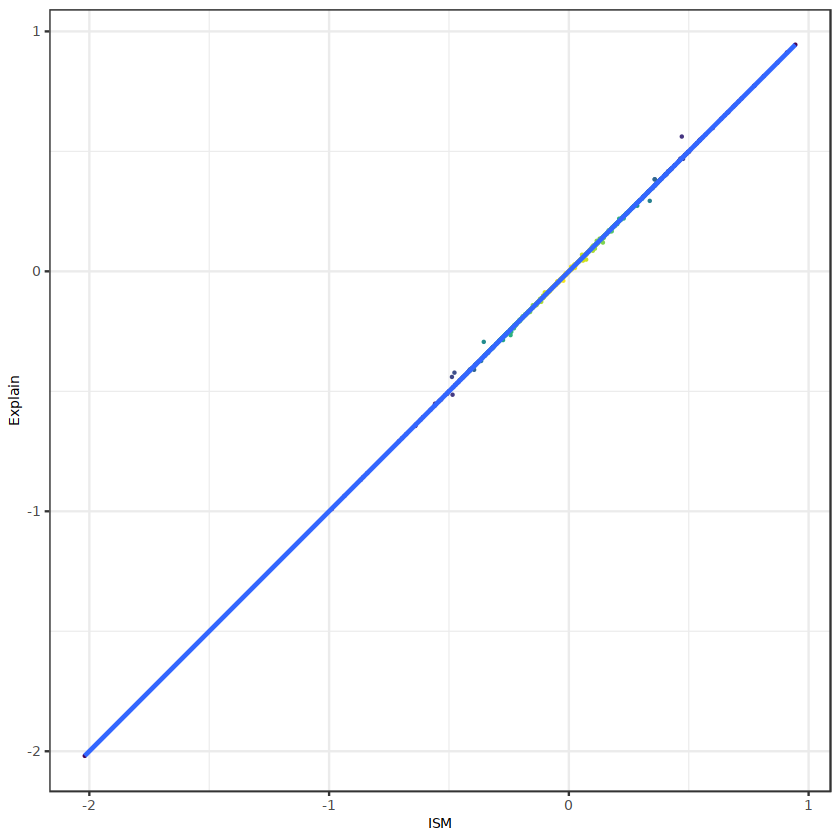

In [6]:
 cor.test(df$explain_score, df$ISM_score, method = "pearson", conf.level = 0.95)
ggplot(df, aes(x=ISM_score,y=explain_score)) +
    # geom_point()
      geom_pointdensity(size = .2) +
      scale_color_viridis() +
      theme_bw() +
       theme( plot.title = element_text(color="Black", size=8, hjust = 0.5),
       # axis.text.x = element_text( angle=45, hjust = 1),
       axis.text = element_text(size = 8),
       legend.position = "none",
       axis.title=element_text(size=8)) +
    xlab('ISM') +
    ylab("Explain") + geom_smooth(method=lm, se=FALSE)
ggsave('MG.explain.ISM.pdf', height = 1.25, width =1.25)